# Setting up the notebook

In [1]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython.display import HTML
from numpy import sqrt, cos, sin, tan

# Plotting linear transformations on sets of points

In [2]:
# Creating a set of vectors arranged on a circle to vizualize

R = 1.0 # radius the points will sit at. 
N_POINTS = 60 # the number of points to draw
theta = np.linspace(0, 2*np.pi, N_POINTS, endpoint=False) # angles for the points
V_sel = [0, 15] # Special points to fully draw the vectors  

# Defining the set of vectors, one at each theta
V = np.array([(R*np.cos(i), R*np.sin(i)) for i in theta]).T

# Picking some pretty colors to use for the points
hsv = cm.get_cmap('hsv', N_POINTS)
colors = list(hsv(range(N_POINTS)))

In [3]:
theta

array([0.        , 0.10471976, 0.20943951, 0.31415927, 0.41887902,
       0.52359878, 0.62831853, 0.73303829, 0.83775804, 0.9424778 ,
       1.04719755, 1.15191731, 1.25663706, 1.36135682, 1.46607657,
       1.57079633, 1.67551608, 1.78023584, 1.88495559, 1.98967535,
       2.0943951 , 2.19911486, 2.30383461, 2.40855437, 2.51327412,
       2.61799388, 2.72271363, 2.82743339, 2.93215314, 3.0368729 ,
       3.14159265, 3.24631241, 3.35103216, 3.45575192, 3.56047167,
       3.66519143, 3.76991118, 3.87463094, 3.97935069, 4.08407045,
       4.1887902 , 4.29350996, 4.39822972, 4.50294947, 4.60766923,
       4.71238898, 4.81710874, 4.92182849, 5.02654825, 5.131268  ,
       5.23598776, 5.34070751, 5.44542727, 5.55014702, 5.65486678,
       5.75958653, 5.86430629, 5.96902604, 6.0737458 , 6.17846555])

In [4]:
V

array([[ 1.00000000e+00,  9.94521895e-01,  9.78147601e-01,
         9.51056516e-01,  9.13545458e-01,  8.66025404e-01,
         8.09016994e-01,  7.43144825e-01,  6.69130606e-01,
         5.87785252e-01,  5.00000000e-01,  4.06736643e-01,
         3.09016994e-01,  2.07911691e-01,  1.04528463e-01,
         6.12323400e-17, -1.04528463e-01, -2.07911691e-01,
        -3.09016994e-01, -4.06736643e-01, -5.00000000e-01,
        -5.87785252e-01, -6.69130606e-01, -7.43144825e-01,
        -8.09016994e-01, -8.66025404e-01, -9.13545458e-01,
        -9.51056516e-01, -9.78147601e-01, -9.94521895e-01,
        -1.00000000e+00, -9.94521895e-01, -9.78147601e-01,
        -9.51056516e-01, -9.13545458e-01, -8.66025404e-01,
        -8.09016994e-01, -7.43144825e-01, -6.69130606e-01,
        -5.87785252e-01, -5.00000000e-01, -4.06736643e-01,
        -3.09016994e-01, -2.07911691e-01, -1.04528463e-01,
        -1.83697020e-16,  1.04528463e-01,  2.07911691e-01,
         3.09016994e-01,  4.06736643e-01,  5.00000000e-0

In [34]:
# Defining some functions to plot the points and special points in the transformation

def plot_points(ax, points, sel=None, colors='blue', marker='o', size=10.0, alpha=1.0, zorder=0):
    ax.set_aspect('equal')
    if not isinstance(colors, list):
        colors = len(points[0]) * [colors]   
    out = ax.scatter(points[0,:], points[1,:], c=colors, marker=marker, s=size, alpha=alpha, zorder=zorder)
    if sel is not None:
        for i in V_sel:
            ax.plot([0,points[0][i]], [0, points[1][i]], color=colors[i], linewidth=3, alpha=alpha)
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    return(out)

(-3.0, 3.0)

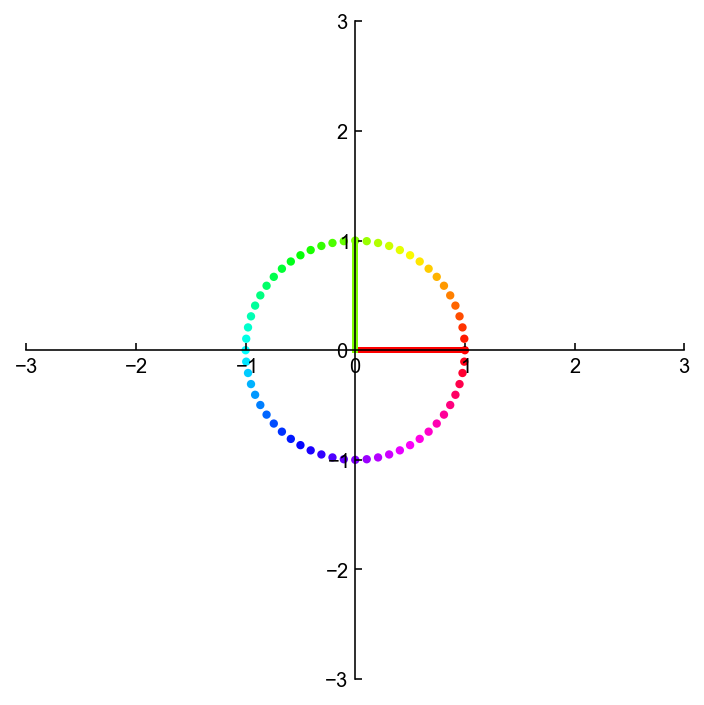

In [35]:
# Plotting the initial set of points V as a color wheel

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')

# Plotting the points
a = plot_points(ax, V, colors=colors, sel=V_sel, zorder=1)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

In [36]:
# Definining the linear transformation using the matrix M (CHANGE THE NUMBERS BELOW)
M = np.array(
    [[2, 3],
     [2, 1]]
    )

# Matrix multiplicaton (@) of points V by M to get new points V2
V2 = M @ V

(-5.0, 5.0)

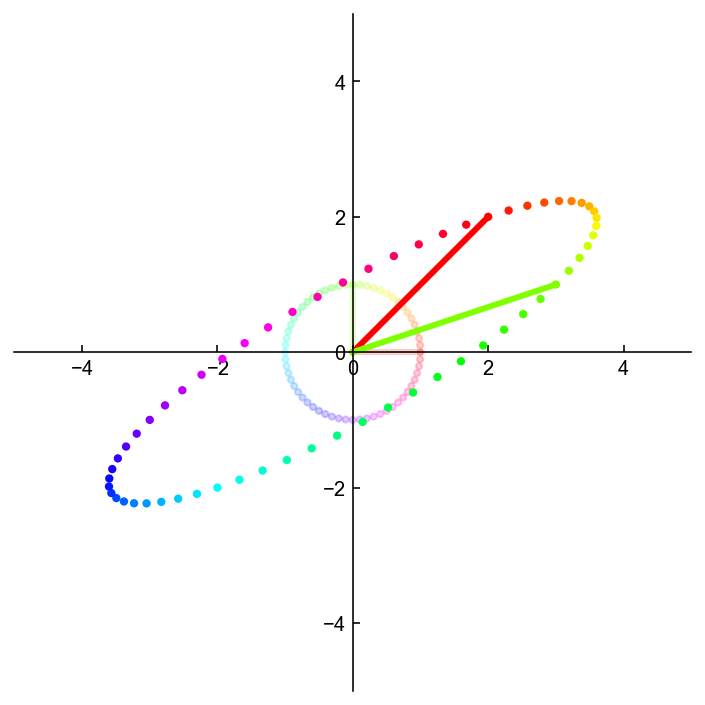

In [37]:
# Plotting the result of multiplying V by M (along with the initial set, V)

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))

# Plotting the points
plot_points(ax, V, sel=V_sel, colors=colors, zorder=1, alpha=.2)

# Plotting the new points
plot_points(ax, V2, sel=V_sel, colors=colors, zorder=3)

# Setting the scale of x and y axis
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

## Finding and plotting eigenvalues

In [38]:
def plot_eigs(ax, M, zorder=3):
    w, v = np.linalg.eig(M)
    T = np.linspace(-100, 100, 10)
    v1 = v[:,0]
    v2 = v[:,1]
    
    X1 = v1[0]*T
    Y1 = v1[1]*T
    
    X2 = v2[0]*T
    Y2 = v2[1]*T

    ax.arrow(0, 0, w[0]*v1[0], w[0]*v1[1], width=.05, length_includes_head=True, color='k')
    ax.arrow(0, 0, v1[0], v1[1], width=.05, length_includes_head=True, color='.5')

    ax.arrow(0, 0, w[1]*v2[0], w[1]*v2[1], width=.05, length_includes_head=True, color='k')
    ax.arrow(0, 0, v2[0], v2[1], width=.05, length_includes_head=True, color='.5')
    pass

def prettyprint_eig(M):
    vals, mat = eig(M)
    for i in range(len(vals)):
        if np.imag(vals[i]) == 0.0:
            vals = np.array(vals, dtype='float')
        print(f"\tEigenvalue {i+1} is {vals[i]:.3}, with vector ({mat[0,i]:.3}, {mat[1,i]:.3})")

(-5.0, 5.0)

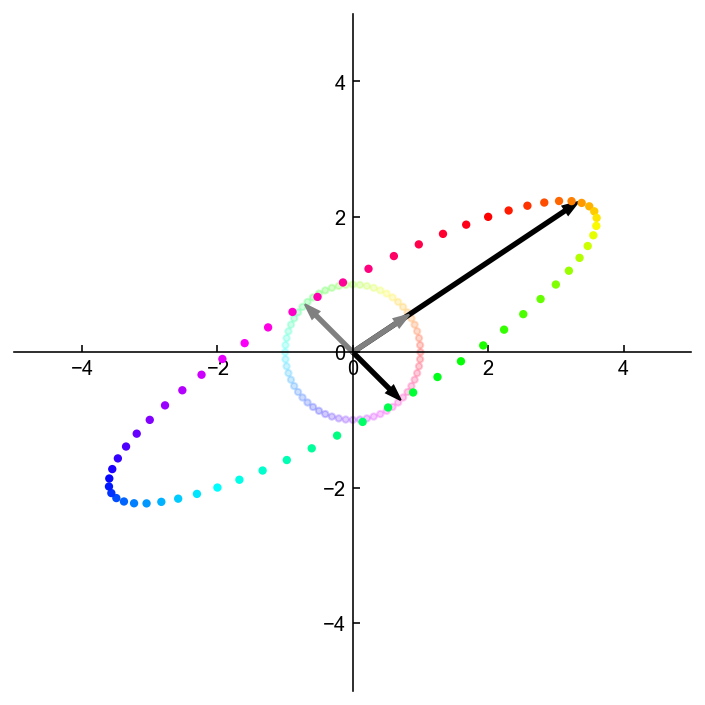

In [40]:
# Plotting the result of multiplying V by M (along with the initial set, V) & conserved directions (eigenvalues)

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))

# Plotting the points
plot_points(ax, V, colors=colors, zorder=1, alpha=.2)

# Plotting the newpoints
plot_points(ax, V2, colors=colors, zorder=3)
try:
    plot_eigs(ax, M)
except:
    pass
    
# Setting the scale of x and y axis
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

In [16]:
# Printing the eigenvalues and vectors
prettyprint_eig(M)

	Eigenvalue 1 is 4.0, with vector (0.832, 0.555)
	Eigenvalue 2 is -1.0, with vector (-0.707, 0.707)


<ipython-input-13-fc3a64477128>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  vals = np.array(vals, dtype='float')
